

<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
    Sentiment Analysis || BERT || Transformers
</div>


![](https://calln.com/wp-content/uploads/2019/10/Sentiment-Analysis-Infographic-860x600-860x600.png)


- Sentiment analysis, also known as opinion mining, is a process that involves analyzing text to determine the sentiment expressed, such as positive, negative, or neutral.
  
- It uses natural language processing (NLP) and machine learning techniques to understand the emotions, opinions, and attitudes conveyed in textual data.

- The goal of sentiment analysis is to extract subjective information from text, allowing businesses and organizations to gain insights into public opinion, customer feedback, social media trends, and more.

- Sentiment analysis has widespread applications in various fields, including marketing, customer service, social media monitoring, market research, and product development.

- Businesses use sentiment analysis to analyze customer reviews, social media posts, surveys, and other forms of textual data to understand customer sentiment, identify trends, and make data-driven decisions.

- Sentiment analysis algorithms classify text into categories such as positive, negative, or neutral based on the words, phrases, and context used in the text.

- Sentiment analysis can be performed at different levels, including document-level (analyzing entire documents), sentence-level (analyzing individual sentences), and aspect-level (analyzing specific aspects or features mentioned in the text).

Overall, sentiment analysis helps businesses and organizations better understand and respond to customer sentiment, improve products and services, and enhance overall customer satisfaction.

<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
   RNN || TRANSFORMERS || BERT
</div>


![](https://publish-01.obsidian.md/access/fc5a2dd092cb06eefdd04ff307334d7a/_attachments/BERT%20Architecture.png)

BERT (Bidirectional Encoder Representations from Transformers) is a powerful pre-trained language model developed by Google AI, specifically designed for natural language processing (NLP) tasks. Here are some key points about BERT:

- **Bidirectional Encoding:** BERT is bidirectional, meaning it can understand the context of a word based on both the words that come before and after it in a sentence. This bidirectional approach helps capture deeper contextual meanings and nuances in text.

- **Transformer Architecture:** BERT is based on the Transformer architecture, which uses self-attention mechanisms to weigh the importance of different words in a sentence. This architecture allows BERT to efficiently process and understand long-range dependencies in text.

- **Pre-trained Model:** BERT is pre-trained on a large corpus of text data, such as Wikipedia articles and books. During pre-training, BERT learns rich word embeddings and contextual representations, which are then fine-tuned for specific downstream NLP tasks.

- **Fine-tuning:** After pre-training, BERT can be fine-tuned on smaller datasets for various NLP tasks such as text classification, named entity recognition, question answering, sentiment analysis, and more. Fine-tuning involves adapting BERT's pre-trained parameters to the specific task at hand, improving its performance and accuracy.

- **Contextual Word Embeddings:** BERT generates contextual word embeddings, which means that the meaning of a word can vary based on its context within a sentence. This allows BERT to capture polysemy (multiple meanings of words) and disambiguate words based on their surrounding context.

- **State-of-the-Art Performance:** BERT has achieved state-of-the-art performance on a wide range of NLP benchmarks and tasks, surpassing previous models in accuracy and efficiency. Its ability to capture complex linguistic patterns and semantic relationships makes it a popular choice for NLP researchers and practitioners.

- **Open-Source Implementation:** BERT is available as an open-source implementation, allowing developers and researchers to use, modify, and fine-tune the model for their specific applications. This accessibility has contributed to its widespread adoption and impact in the NLP community.

Overall, BERT has revolutionized the field of NLP by introducing advanced techniques for contextual understanding of text, leading to significant advancements in various NLP applications and tasks.

<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
   IMPORTING LIBRARY
</div>


In [1]:
import numpy as np 
import pandas as pd 
#for pytorch
import torch
import torch.nn as nn
device = torch.device("cuda")

#for BERT
import transformers
from transformers import AutoModel, BertTokenizerFast
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
# optimizer from hugging face transformers
from transformers import AdamW
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/bert-sentiment-analysis/Sentiment Analysis.csv


<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
   Reading The Data
</div>


In [2]:
df=pd.read_csv('/kaggle/input/bert-sentiment-analysis/Sentiment Analysis.csv')

<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
   Sample Of Data
</div>


In [3]:
df.head()

,sentence,label
0,Ok brokeback mountain is such a horrible movie.,0
1,Brokeback Mountain was so awesome.,1
2,friday hung out with kelsie and we went and sa...,0
3,I am going to start reading the Harry Potter s...,1
4,"Is it just me, or does Harry Potter suck?...",0


<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
   Data describe
</div>


In [4]:
df.describe()

,label
count,5668.000000
mean,0.565279
std,0.495764
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [5]:
lens=[len(i.split()) for i in df.sentence]

(array([2113., 1092.,  912.,  692.,  276.,  253.,  155.,   29.,  142.,
           4.]),
 array([ 3. ,  6.7, 10.4, 14.1, 17.8, 21.5, 25.2, 28.9, 32.6, 36.3, 40. ]),
 <BarContainer object of 10 artists>)

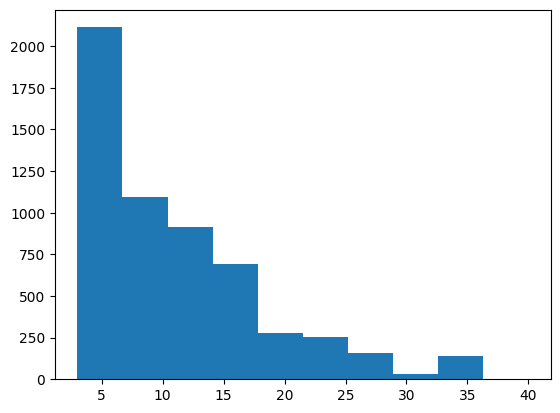

In [6]:
import matplotlib.pyplot as plt
plt.hist(lens)

<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
   Installing Transformers
</div>


In [7]:
!pip install transformers

<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
   Train-Test-Split
</div>


In [8]:
# split into train, validation and test sets in the ration 70 : 15 : 15
train_text, temp_text, train_labels, temp_labels = train_test_split(df['sentence'], df['label'], 
                                                                    random_state=2021, 
                                                                    test_size=0.3, 
                                                                    stratify=df['label'])


val_text, test_text, val_labels, test_labels = train_test_split(temp_text, temp_labels, 
                                                                random_state=2021, 
                                                                test_size=0.5, 
                                                                stratify=temp_labels)

<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
   IMPORTING BERT PRE-TRAINED MODEL
</div>


In [9]:
# import BERT-base pretrained model
bert = AutoModel.from_pretrained('bert-base-uncased')

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
   IMPORTING BERT TOKENIZER
</div>


In [10]:
# Load the BERT tokenizer
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

(array([1504.,  701.,  572.,  521.,  164.,  215.,  117.,   63.,  104.,
           6.]),
 array([ 3. ,  6.5, 10. , 13.5, 17. , 20.5, 24. , 27.5, 31. , 34.5, 38. ]),
 <BarContainer object of 10 artists>)

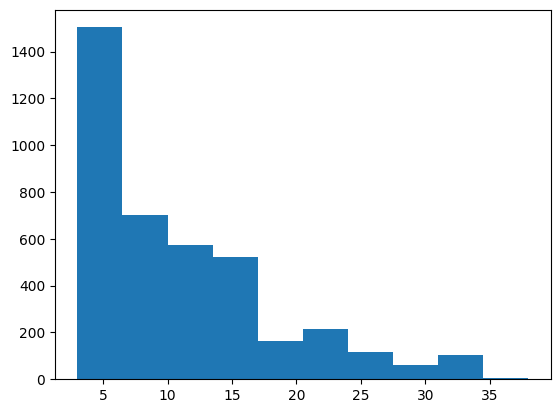

In [11]:
train_lens=[len(i.split()) for i in train_text]
plt.hist(train_lens)

In [12]:
pad_len=17

<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
   Tokenizing The Data
</div>


In [13]:

# tokenize and encode sequences 
tokens_train = tokenizer.batch_encode_plus(
    train_text.tolist(),
    max_length = pad_len,
    pad_to_max_length=True,
    truncation=True
)

tokens_val = tokenizer.batch_encode_plus(
    val_text.tolist(),
    max_length = pad_len,
    pad_to_max_length=True,
    truncation=True
)

tokens_test = tokenizer.batch_encode_plus(
    test_text.tolist(),
    max_length = pad_len,
    pad_to_max_length=True,
    truncation=True
)

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:2645: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [14]:
train_seq = torch.tensor(tokens_train['input_ids'])
train_mask = torch.tensor(tokens_train['attention_mask'])
train_y = torch.tensor(train_labels.tolist())

val_seq = torch.tensor(tokens_val['input_ids'])
val_mask = torch.tensor(tokens_val['attention_mask'])
val_y = torch.tensor(val_labels.tolist())

test_seq = torch.tensor(tokens_test['input_ids'])
test_mask = torch.tensor(tokens_test['attention_mask'])
test_y = torch.tensor(test_labels.tolist())

<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
   Defining Some Parameters
</div>


In [15]:
#define a batch size
batch_size = 64

# wrap tensors
train_data = TensorDataset(train_seq, train_mask, train_y)

# sampler for sampling the data during training
train_sampler = RandomSampler(train_data)

# dataLoader for train set
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# wrap tensors
val_data = TensorDataset(val_seq, val_mask, val_y)

# sampler for sampling the data during training
val_sampler = SequentialSampler(val_data)

# dataLoader for validation set
val_dataloader = DataLoader(val_data, sampler = val_sampler, batch_size=batch_size)
     

# freeze the BERT architecture

for param in bert.parameters():
    param.requires_grad = False

<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
   BERT Architecture
</div>


![](https://i0.wp.com/neptune.ai/wp-content/uploads/2022/10/Attention_diagram_transformer.png?ssl=1)

In [16]:
class BERT_architecture(nn.Module):

    def __init__(self, bert):
      
      super(BERT_architecture, self).__init__()

      self.bert = bert 
      
      # dropout layer
      self.dropout = nn.Dropout(0.2)
      
      # relu activation function
      self.relu =  nn.ReLU()

      # dense layer 1
      self.fc1 = nn.Linear(768,512)
      
      # dense layer 2 (Output layer)
      self.fc2 = nn.Linear(512,2)

      #softmax activation function
      self.softmax = nn.LogSoftmax(dim=1)

    #define the forward pass
    def forward(self, sent_id, mask):

      #pass the inputs to the model  
      _, cls_hs = self.bert(sent_id, attention_mask=mask, return_dict=False)
      
      x = self.fc1(cls_hs)

      x = self.relu(x)

      x = self.dropout(x)

      # output layer
      x = self.fc2(x)
      
      # apply softmax activation
      x = self.softmax(x)

      return x

In [17]:
# pass the pre-trained BERT to our define architecture
model = BERT_architecture(bert)

# push the model to GPU
model = model.to(device)

In [18]:
# define the optimizer
optimizer = AdamW(model.parameters(),lr = 1e-5)  

/opt/conda/lib/python3.10/site-packages/transformers/optimization.py:429: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [19]:
from sklearn.utils.class_weight import compute_class_weight
#compute the class weights
class_weights = compute_class_weight(class_weight = "balanced",
                                        classes = np.unique(train_labels),
                                        y = train_labels 
                                     )
print("class weights are {} for {}".format(class_weights,np.unique(train_labels)))

class weights are [1.14985507 0.88470116] for [0 1]


In [20]:
#count of both the categories of training labels
pd.value_counts(train_labels)

/tmp/ipykernel_26/26686347.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(train_labels)


label
1    2242
0    1725
Name: count, dtype: int64

In [21]:
#wrap class weights in tensor
weights= torch.tensor(class_weights,dtype=torch.float)

# push weights to GPU
weights = weights.to(device)

# define loss function
# add weights to handle the "imbalance" in the dataset
cross_entropy  = nn.NLLLoss(weight=weights) 

# number of training epochs
epochs = 100

In [22]:
# function to train the model
def train():
  
  model.train()

  total_loss, total_accuracy = 0, 0
  
  # empty list to save model predictions
  total_preds=[]
  
  # iterate over batches
  for step,batch in enumerate(train_dataloader):
    
    # progress update after every 50 batches.
    if step % 50 == 0 and not step == 0:
      print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(train_dataloader)))

    # push the batch to gpu
    batch = [r.to(device) for r in batch]
 
    sent_id, mask, labels = batch

    # clear previously calculated gradients 
    model.zero_grad()        

    # get model predictions for the current batch
    preds = model(sent_id, mask)

    # compute the loss between actual and predicted values
    loss = cross_entropy(preds, labels)

    # add on to the total loss
    total_loss = total_loss + loss.item()

    # backward pass to calculate the gradients
    loss.backward()

    # clip the the gradients to 1.0. It helps in preventing the exploding gradient problem
    torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

    # update parameters
    optimizer.step()

    # model predictions are stored on GPU. So, push it to CPU
    preds=preds.detach().cpu().numpy()

    # append the model predictions
    total_preds.append(preds)

  # compute the training loss of the epoch
  avg_loss = total_loss / len(train_dataloader)
  
  # predictions are in the form of (no. of batches, size of batch, no. of classes).
  # reshape the predictions in form of (number of samples, no. of classes)
  total_preds  = np.concatenate(total_preds, axis=0)

  #returns the loss and predictions
  return avg_loss, total_preds

In [23]:
# function for evaluating the model
def evaluate():
  
  print("\nEvaluating...")
  
  # deactivate dropout layers
  model.eval()

  total_loss, total_accuracy = 0, 0
  
  # empty list to save the model predictions
  total_preds = []

  # iterate over batches
  for step,batch in enumerate(val_dataloader):
    
    # Progress update every 50 batches.
    if step % 50 == 0 and not step == 0:
      
      # # Calculate elapsed time in minutes.
      # elapsed = format_time(time.time() - t0)
            
      # Report progress.
      print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(val_dataloader)))

    # push the batch to gpu
    batch = [t.to(device) for t in batch]

    sent_id, mask, labels = batch

    # deactivate autograd
    with torch.no_grad():
      
      # model predictions
      preds = model(sent_id, mask)

      # compute the validation loss between actual and predicted values
      loss = cross_entropy(preds,labels)

      total_loss = total_loss + loss.item()

      preds = preds.detach().cpu().numpy()

      total_preds.append(preds)

  # compute the validation loss of the epoch
  avg_loss = total_loss / len(val_dataloader) 

  # reshape the predictions in form of (number of samples, no. of classes)
  total_preds  = np.concatenate(total_preds, axis=0)

  return avg_loss, total_preds


<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
   Training Of BERT Model
</div>


In [24]:
# set initial loss to infinite
best_valid_loss = float('inf')

# empty lists to store training and validation loss of each epoch
train_losses=[]
valid_losses=[]

#for each epoch
for epoch in range(epochs):
     
    print('\n Epoch {:} / {:}'.format(epoch + 1, epochs))
    
    #train model
    train_loss, _ = train()
    
    #evaluate model
    valid_loss, _ = evaluate()
    
    #save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'saved_weights.pt')
    
    # append training and validation loss
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)
    
    print('\nTraining Loss: {}'.format(train_loss))
    print('Validation Loss: {}'.format(valid_loss))
     


 Epoch 1 / 100
  Batch    50  of     62.

Evaluating...

Training Loss: 0.6942982173735096
Validation Loss: 0.6865829910550799

 Epoch 2 / 100
  Batch    50  of     62.

Evaluating...

Training Loss: 0.6857223347310097
Validation Loss: 0.6788262213979449

 Epoch 3 / 100
  Batch    50  of     62.

Evaluating...

Training Loss: 0.6839109784172427
Validation Loss: 0.6731255437646594

 Epoch 4 / 100
  Batch    50  of     62.

Evaluating...

Training Loss: 0.6791575003054834
Validation Loss: 0.6689361844744001

 Epoch 5 / 100
  Batch    50  of     62.

Evaluating...

Training Loss: 0.6742743522890152
Validation Loss: 0.6644086156572614

 Epoch 6 / 100
  Batch    50  of     62.

Evaluating...

Training Loss: 0.6717363711326353
Validation Loss: 0.6603528431483677

 Epoch 7 / 100
  Batch    50  of     62.

Evaluating...

Training Loss: 0.6698466875860768
Validation Loss: 0.6578725874423981

 Epoch 8 / 100
  Batch    50  of     62.

Evaluating...

Training Loss: 0.6660159211004933
Validation L

<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
   Training Graph
</div>


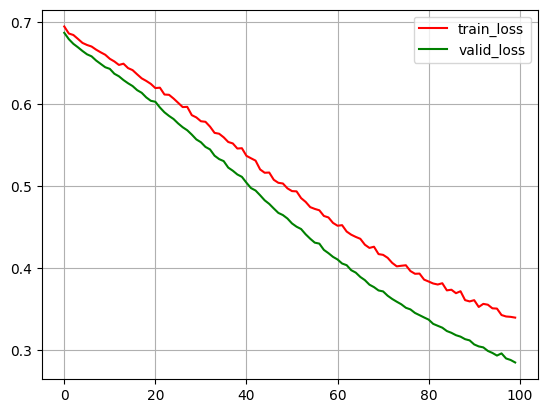

In [25]:
from matplotlib import pyplot as plt
plt.plot(train_losses,color = 'red',label = 'train_loss')
plt.plot(valid_losses,color = 'green',label = 'valid_loss')
plt.grid()
plt.legend()
plt.show()

<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
   Saving The Models
</div>


In [26]:
#load weights of best model
path = 'saved_weights.pt'
model.load_state_dict(torch.load(path))

<All keys matched successfully>

<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
   Prediction
</div>


In [27]:
# get predictions for test data
with torch.no_grad():
  preds = model(test_seq.to(device), test_mask.to(device))
  preds = preds.detach().cpu().numpy()

In [28]:
from sklearn.metrics import classification_report,accuracy_score

<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
   Evaluation
</div>


In [29]:
pred = np.argmax(preds, axis = 1)
# Calculate classification report and accuracy
report = classification_report(test_y, pred, output_dict=True)
accuracy = accuracy_score(test_y, pred)

# Print classification report
print("Classification Report:")
print(classification_report(test_y, pred))

# Print accuracy
print("Accuracy:", accuracy)


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       370
           1       0.93      0.91      0.92       481

    accuracy                           0.91       851
   macro avg       0.91      0.91      0.91       851
weighted avg       0.91      0.91      0.91       851

Accuracy: 0.9106933019976499


In [30]:
# Create a DataFrame to store metrics
metrics_df = pd.DataFrame(report).transpose()

# Add accuracy to the DataFrame
metrics_df.loc['accuracy'] = accuracy

# Display the DataFrame
print("\nMetrics DataFrame:")
metrics_df


Metrics DataFrame:


,precision,recall,f1-score,support
0,0.882812,0.916216,0.899204,370.000000
1,0.933619,0.906445,0.919831,481.000000
accuracy,0.910693,0.910693,0.910693,0.910693
macro avg,0.908216,0.911331,0.909518,851.000000
weighted avg,0.911529,0.910693,0.910863,851.000000


<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
   Prediction Sample
</div>


In [31]:
def convert_predictions(binary_predictions):
    return np.where(binary_predictions == 0, "negative", "True")
pred_mapped = convert_predictions(pred)
pred_mapped[:50]

array(['negative', 'negative', 'True', 'True', 'negative', 'negative',
       'True', 'True', 'True', 'negative', 'negative', 'negative', 'True',
       'negative', 'negative', 'True', 'negative', 'True', 'negative',
       'True', 'True', 'negative', 'negative', 'negative', 'True',
       'negative', 'True', 'True', 'negative', 'True', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'True', 'True', 'negative', 'True', 'True',
       'True', 'True', 'negative', 'negative', 'True', 'True', 'True'],
      dtype='<U8')